# Walk Through Example PCA
(artificial data set)
<bf>

**0) Loading libraries**

In the first example we want to perform PCA on a simple, artificial dataset. First, we import the standard libraries:

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Next, we call *PCA* and a *plotly* library for 3D plots:

In [ ]:
#pip install plotly

In [49]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

<br>

**1) Reading the data set**

Next, we read the dataset using *pandas*. Note, that the dataset is just an ordinary text file.

In [51]:
XYZdf = pd.read_csv("Rot.txt", sep='\s+', header = None)
XYZ   = np.array(XYZdf)

<br>

In [53]:
print(XYZ[:10,:])

[[ 0.33081943  0.45734576 -0.82262406]
 [ 0.67669288 -1.6715215  -0.94859782]
 [-0.95305064  1.20355515  1.65998711]
 [ 0.30285413 -0.89517989 -0.38312783]
 [ 0.17270743  0.10355646 -0.39138773]
 [-0.63093193  0.13017985  1.28663078]
 [-0.12630704  0.6362063   0.08576791]
 [ 0.23533518  0.46688705 -0.62504655]
 [ 1.73481823 -0.29672168 -3.55497488]
 [ 1.15988794 -1.53706648 -1.99988799]]


**2) Plotting the data set**

The dataset has just three features. Therefore, we can visualize the data in a standard 3D scatter plot.

In [55]:
print(XYZ.shape)

(100, 3)


a) 3D scatter plot

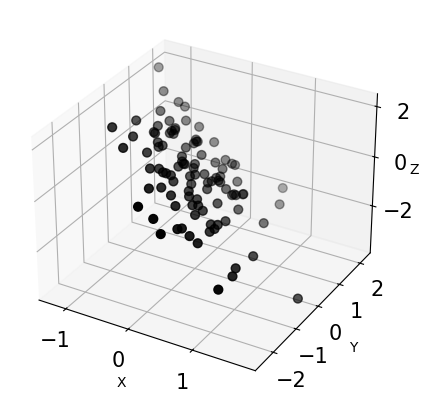

In [57]:
# standard3D plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(XYZ[:,0], XYZ[:,1], XYZ[:,2], c = 'black', marker = 'o', s = 40)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.zaxis.labelpad = -3 
plt.show()

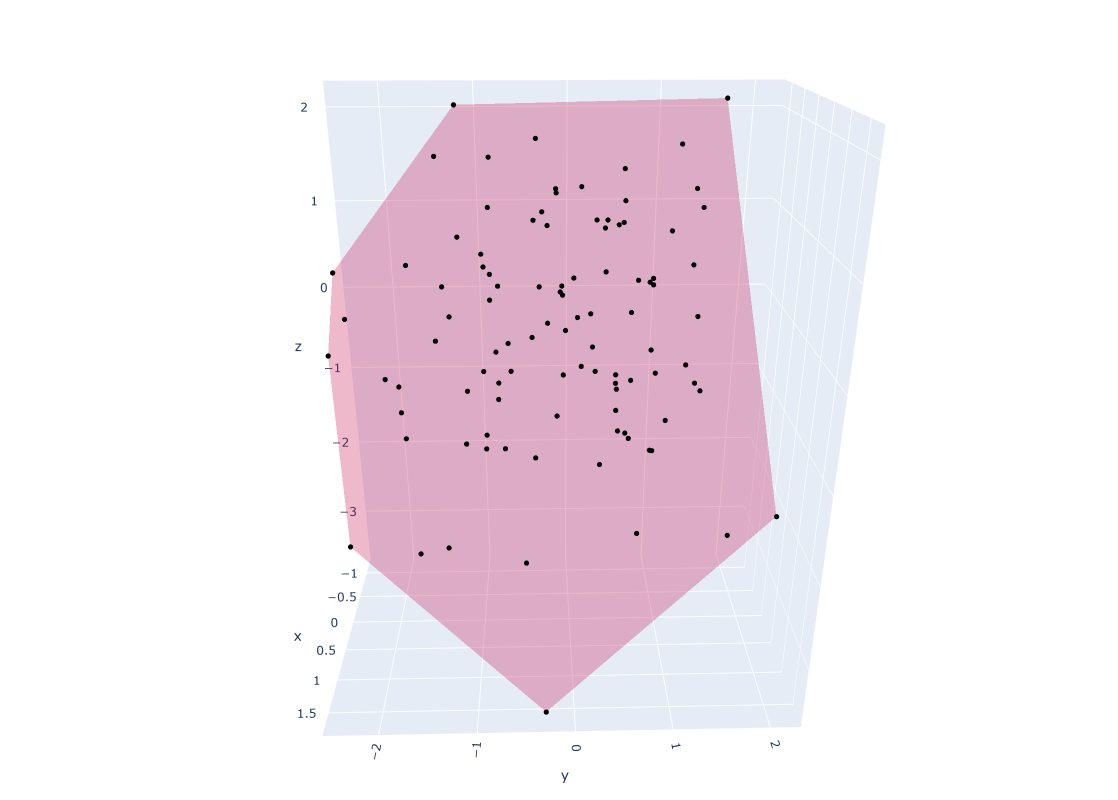

In [59]:
mesh    = go.Mesh3d(x = XYZ[:,0], y = XYZ[:,1], z = XYZ[:,2], opacity = 0.5, color='rgba(244,22,100,0.6)')
scatter = go.Scatter3d(x = XYZ[:,0], y = XYZ[:,1], z = XYZ[:,2], mode = 'markers', marker = dict(size = 3, color = 'black'))
fig     = go.Figure(data = [mesh, scatter])
fig.update_layout(width = 800, height = 800, margin = dict(r = 10, b = 10, l = 10, t = 10))
fig.show()

It seems as if the x,y coordinates correlate with the z coordinate. We can check that by displaying the correlation values in a headmap: 

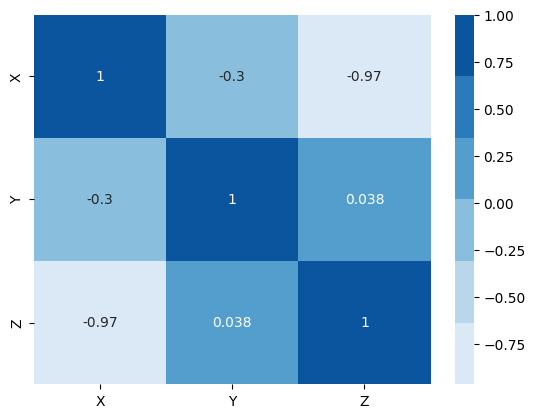

In [61]:
XYZdf.columns = ['X', 'Y', 'Z']
sns.heatmap(XYZdf.corr(), annot=True, cmap = sns.color_palette("Blues"))
plt.show()

A more sophisticated plot using *plotly* shows clearly the correlation of the x,y coordinates with the z coordinate.

<br>

**3) Running PCA**

Let us therefore now run a PCA, i. e. transforming the dataset into its proper (= eigen) coordinate system.

In [63]:
out = PCA(n_components = 3).fit(XYZ)

eigenVec = out.components_          #eigen vectors
eigenVal = out.explained_variance_  #eigen values
eigenXYZ = out.transform(XYZ)       #dataset transformed into its proper (= eigen) coordinate system

In [65]:
print(eigenVec)
#print(eigenVal)

[[-0.44357702  0.27736323  0.85223769]
 [ 0.01597521  0.95320324 -0.3019079 ]
 [ 0.89609387  0.12030473  0.42724998]]


In [67]:
v1 = eigenVec[:,0]
v2 = eigenVec[:,1]
v3 = eigenVec[:,2]

In [75]:
np.dot(v1,v1)

0.9999999999999999

As we expected, one eigenvalue is essentially zero (keep the limited numerical accuracy in mind).

In [73]:
epsilon = np.finfo(float).eps
print(epsilon)

2.220446049250313e-16


In [77]:
print(eigenVal)

[1.37259190e+00 9.88707669e-01 1.47232501e-16]


<br>

**4) Plotting Eigenvalue Spectrum and Data in Eigenspace**

Finally, we want to plot the eigenvalue spectrum... 

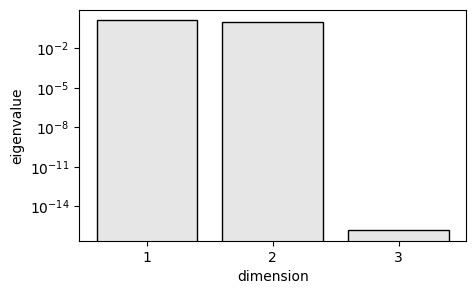

In [79]:
xplot = np.arange(1,4)

fig = plt.figure(figsize=(5, 3))
plt.bar(xplot, eigenVal, color = (0.9, 0.9, 0.9), edgecolor = 'black')
plt.xlabel('dimension')
plt.ylabel('eigenvalue')
plt.yscale('log')
plt.xticks(xplot)
plt.show()

...and the data itself. Note that each eigen coordinate is now a linear combination of the previous coordinates.

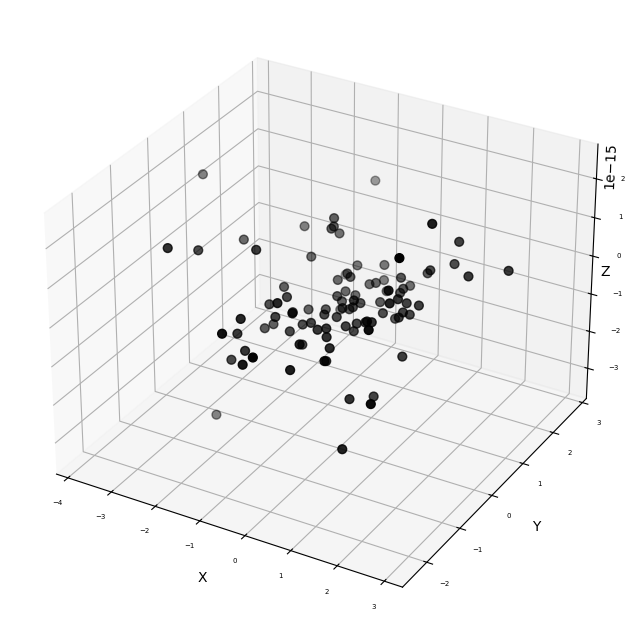

In [81]:
# standard3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(eigenXYZ[:,0], eigenXYZ[:,1], eigenXYZ[:,2], c = 'black', marker = 'o', s = 40)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis = 'both', which = 'major', labelsize = 5)
ax.zaxis.labelpad = -15 #
plt.show()

Knowing, that the 3rd coordinate is not needed, we can display the data just with an ordinary 2D scatter plot.

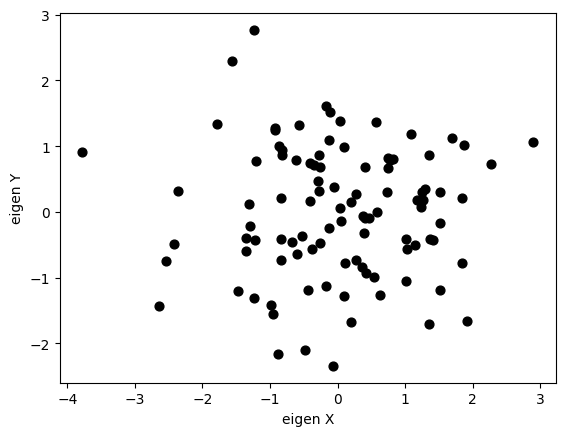

In [83]:
plt.scatter(eigenXYZ[:,0], eigenXYZ[:,1], c = 'black', marker = 'o', s = 40)
plt.xlabel('eigen X')
plt.ylabel('eigen Y')
plt.show()